### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")
import mysql
from mysql import connector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy import stats
import math
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
# Getting pre-processed data
data_preprocessed = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None)

In [3]:
data_preprocessed

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,27,0,3,0,5,13,1,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,4
1196,1196,37,1,1,2,1,15,2,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,3
1197,1197,50,1,3,1,1,15,2,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,3
1198,1198,34,0,3,2,0,1,2,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,3


In [4]:
# Dropping unwanted column
data_preprocessed.drop("Unnamed: 0",axis=1,inplace=True)

# Selecting dependent and independent values

In [5]:
x=data_preprocessed.drop("PerformanceRating",axis=1) # independent features
y=data_preprocessed[["PerformanceRating"]] # dependent feature

# Scaling/normalizing data

In [6]:
from sklearn.preprocessing import MinMaxScaler # using min max scaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x) # data transformation

# Splitting the data into train and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=2) # splitting data into train and test set

# Balancing the target class using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE # using SMOTE to balance
from collections import Counter
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [9]:
print(Counter(y_train))
print(Counter(y_sm)) # Balanced data

Counter({'PerformanceRating': 1})
Counter({'PerformanceRating': 1})


In [10]:
print("target class before balancing:",y_train.value_counts()) 
print("target class after balancing:",y_sm.value_counts())

target class before balancing: PerformanceRating
3                    614
2                    138
4                     88
dtype: int64
target class after balancing: PerformanceRating
2                    614
3                    614
4                    614
dtype: int64


# Model building
## Logistic Regression
### For testing

In [11]:
lr=LogisticRegression(multi_class="ovr")
lr.fit(x_sm,y_sm)
y_pred=lr.predict(x_test)
y_pred

array([3, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2,
       2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2,
       2, 4, 4, 3, 2, 3, 2, 3, 3, 2, 4, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 2,
       3, 3, 4, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 2, 2, 3,
       3, 4, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 2, 4, 3, 4, 3, 3, 2, 3, 4, 3, 3, 2, 2, 3, 3, 4, 2, 3, 3, 3, 4,
       4, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 4, 3, 2, 3, 4, 3, 3, 3, 2, 4, 4, 3, 3, 2, 4, 3, 3,
       2, 2, 3, 3, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3,
       4, 3, 2, 3, 3, 3, 2, 3, 4, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 4, 2, 3, 3, 2, 3, 4, 3, 4, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 3,

In [12]:
acc=accuracy_score(y_test,y_pred) 
acc

0.7555555555555555

In [13]:
# Printing classification report and confusion metrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 45  10   1]
 [ 43 195  22]
 [  5   7  32]]
              precision    recall  f1-score   support

           2       0.48      0.80      0.60        56
           3       0.92      0.75      0.83       260
           4       0.58      0.73      0.65        44

    accuracy                           0.76       360
   macro avg       0.66      0.76      0.69       360
weighted avg       0.81      0.76      0.77       360



### For training

In [14]:
y_pred_train=lr.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pred_train)
acc_train

0.8463626492942454

# SVM
## For testing

In [15]:
svc=SVC()
svc.fit(x_sm,y_sm)
y_pred1=svc.predict(x_test)

In [16]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.7861111111111111

In [17]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 40  15   1]
 [ 27 224   9]
 [  7  18  19]]
              precision    recall  f1-score   support

           2       0.54      0.71      0.62        56
           3       0.87      0.86      0.87       260
           4       0.66      0.43      0.52        44

    accuracy                           0.79       360
   macro avg       0.69      0.67      0.67       360
weighted avg       0.79      0.79      0.79       360



### For training

In [18]:
y_pred_train1=svc.predict(x_sm)
acc_train1=accuracy_score(y_sm,y_pred_train1)
acc_train1

0.9598262757871878

# Decision Tree
## For testing

In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)
y_pred2=dt.predict(x_test)

In [20]:
acc2=accuracy_score(y_test,y_pred2)
acc2

0.9

In [21]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 48   8   0]
 [ 10 243   7]
 [  2   9  33]]
              precision    recall  f1-score   support

           2       0.80      0.86      0.83        56
           3       0.93      0.93      0.93       260
           4       0.82      0.75      0.79        44

    accuracy                           0.90       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.90      0.90      0.90       360



### For training

In [22]:
y_pred_train2=dt.predict(x_sm)
acc_train2=accuracy_score(y_sm,y_pred_train2)
acc_train2

1.0

# Random Forest
## For testing

In [23]:
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)
y_pred3=rf.predict(x_test)

In [24]:
acc3=accuracy_score(y_test,y_pred3)
acc3

0.9277777777777778

In [25]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 50   6   0]
 [  4 254   2]
 [  1  13  30]]
              precision    recall  f1-score   support

           2       0.91      0.89      0.90        56
           3       0.93      0.98      0.95       260
           4       0.94      0.68      0.79        44

    accuracy                           0.93       360
   macro avg       0.93      0.85      0.88       360
weighted avg       0.93      0.93      0.92       360



### For training

In [26]:
y_pred_train3=rf.predict(x_sm)
acc_train3=accuracy_score(y_sm,y_pred_train3)
acc_train3

1.0

# Gradient Boosing
## For testing

In [27]:
gb=GradientBoostingClassifier()
gb.fit(x_sm,y_sm)
y_pred4=gb.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
acc4

0.9194444444444444

In [28]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[ 51   5   0]
 [ 11 245   4]
 [  2   7  35]]
              precision    recall  f1-score   support

           2       0.80      0.91      0.85        56
           3       0.95      0.94      0.95       260
           4       0.90      0.80      0.84        44

    accuracy                           0.92       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.92      0.92      0.92       360



### For training

In [29]:
y_pred_train4=gb.predict(x_sm)
acc_train4=accuracy_score(y_sm,y_pred_train4)
acc_train4

0.99728555917481

# ANN

## For testing

In [30]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier(hidden_layer_sizes=(1000,10),learning_rate_init=0.1,max_iter=3,random_state=2)
ANN.fit(x_sm,y_sm)


MLPClassifier(hidden_layer_sizes=(1000, 10), learning_rate_init=0.1, max_iter=3,
              random_state=2)

In [31]:
y_pred5=ANN.predict(x_test)
acc5=accuracy_score(y_test,y_pred5)
acc5

0.7222222222222222

## For training

In [32]:
y_pred_train5=ANN.predict(x_sm)
acc_train5=accuracy_score(y_sm,y_pred_train5)
acc_train5

0.3333333333333333

# Hyperparameter tuning

## Decision Tree

In [33]:
# hyper parameter tuning for decision tree
from sklearn.model_selection import GridSearchCV
params={"criterion":("gini","entropy"),
       "splitter":("best","random"),
       "max_depth":(list(range(1,6))),
       "min_samples_split":[1.0,2.1,3.2,4.3,5.4,6.5,7.6],
       "min_samples_leaf":list(range(1,6))
       }

In [34]:
tree_clf=DecisionTreeClassifier(random_state=3)
tree_cv=GridSearchCV(tree_clf,params,scoring="f1",n_jobs=1,verbose=1,cv=3)
tree_cv.fit(x_sm,y_sm)

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1.0, 2.1, 3.2, 4.3, 5.4, 6.5,
                                               7.6],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [35]:
best_params=tree_cv.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 1.0,
 'splitter': 'best'}

In [36]:
dt1=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 4,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')

In [37]:
dt1.fit(x_sm,y_sm)
y_pred_tune2=dt1.predict(x_test)
acc_tune2=accuracy_score(y_test,y_pred_tune2)
acc_tune2

0.8666666666666667

In [38]:
y_pred_tune_train2=dt1.predict(x_sm)
acc_tune_train2=accuracy_score(y_sm,y_pred_tune_train2)
acc_tune_train2

0.9375678610206297

In [39]:
print(acc_tune_train2)
print(acc_tune2)

0.9375678610206297
0.8666666666666667


## Logistic regression

In [40]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# defining parameters
parameters={
             'penalty':['l1', 'l2', 'elasticnet'],
            
             'C'       : np.logspace(-3,3,7),

            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
        
gcv=GridSearchCV(lr,param_grid=parameters,scoring = 'accuracy',cv = 5,n_jobs=-1)

# fitting the model for grid search
gcv.fit(x_sm,y_sm)

print(gcv.best_params_)
print(gcv.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(multi_class='ovr')


In [41]:
lr2=LogisticRegression(C=10, penalty='l1', solver='liblinear' ) 
lr2.fit(x_sm,y_sm)

y_pred_tune_train= lr2.predict(x_sm)
y_pred_tune= lr2.predict(x_test)

In [42]:
acc_tune_train=accuracy_score(y_sm,y_pred_tune_train)
acc_tune_train

0.8501628664495114

In [43]:
acc_tune=accuracy_score(y_test,y_pred_tune)
acc_tune

0.7388888888888889

In [44]:
print(acc_tune_train)
print(acc_tune)

0.8501628664495114
0.7388888888888889


## SVM

In [45]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C': [0.1, 5, 10, 50, 60, 70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
svc=SVC()
gcv = GridSearchCV(svc, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
gcv.fit(x_sm,y_sm)
gcv.best_estimator_ 

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.4s
[CV] END .....................C=0.1, gamma=1,

SVC(C=0.1, gamma=1, random_state=1)

In [46]:
svc2= SVC(C=50, gamma=1, random_state=1)
svc2.fit(x_sm,y_sm)

y_pred_tune_train1= svc2.predict(x_sm)
y_pred_tune1= svc2.predict(x_test)

In [47]:
acc_tune_train1=accuracy_score(y_sm,y_pred_tune_train1)
acc_tune_train1

1.0

In [48]:
acc_tune1=accuracy_score(y_test,y_pred_tune1)
acc_tune1

0.7666666666666667

In [49]:
print(acc_tune_train1)
print(acc_tune1)

1.0
0.7666666666666667


## Random Forest

In [50]:
# hyperparameter tuning for random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [51]:
rf_cv.fit(x_sm,y_sm)
rf_best_params=rf_cv.best_params_
rf_best_params

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [52]:
rf2=RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= 10,
 bootstrap=True)

In [53]:
rf2.fit(x_sm,y_sm)
y_pred_tune3=rf2.predict(x_test)

In [54]:
acc_tune3=accuracy_score(y_test,y_pred_tune3)
acc_tune3

0.9194444444444444

In [55]:
y_pred_tune_train3=rf2.predict(x_sm)
acc_tune_train3=accuracy_score(y_sm,y_pred_tune_train3)
acc_tune_train3

0.998371335504886

In [56]:
print(acc_tune_train3)
print(acc_tune3)

0.998371335504886
0.9194444444444444


# Comparing all the results

In [57]:
dict={"Model":["Logistic Regression","SVM","Decision Tree","Random Forest","Gradient Boosting","ANN"],
     "Accuracy(test)":[acc,acc1,acc2,acc3,acc4,acc5],
     "Accuracy(train)":[acc_train,acc_train1,acc_train2,acc_train3,acc_train4,acc_train5]}

In [58]:
results=pd.DataFrame(dict)
results

,Model,Accuracy(test),Accuracy(train)
0,Logistic Regression,0.755556,0.846363
1,SVM,0.786111,0.959826
2,Decision Tree,0.900000,1.000000
3,Random Forest,0.927778,1.000000
4,Gradient Boosting,0.919444,0.997286
5,ANN,0.722222,0.333333


In [59]:
results.sort_values(by="Accuracy(test)")

,Model,Accuracy(test),Accuracy(train)
5,ANN,0.722222,0.333333
0,Logistic Regression,0.755556,0.846363
1,SVM,0.786111,0.959826
2,Decision Tree,0.900000,1.000000
4,Gradient Boosting,0.919444,0.997286
3,Random Forest,0.927778,1.000000


#### we have got a trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

# Conclusion : 
## From the above table we can conclude that "Random Forest Algorithm" performs well on this dataset with highest performance metrics.
## so we can conclude that Random Forest is best suited algorithm for this data with an accuracy score of 92%.

In [60]:
# getting important features
important_features=rf.feature_importances_

In [61]:
important_features

array([0.01502782, 0.00307912, 0.01386068, 0.0183163 , 0.04432018,
       0.03441278, 0.00828161, 0.01771809, 0.01457028, 0.23154973,
       0.01995846, 0.01222002, 0.01289865, 0.01313631, 0.01604722,
       0.00488012, 0.24066367, 0.01540356, 0.01336563, 0.01537101,
       0.0476274 , 0.02104663, 0.04177863, 0.09681542, 0.02431722,
       0.00333344])

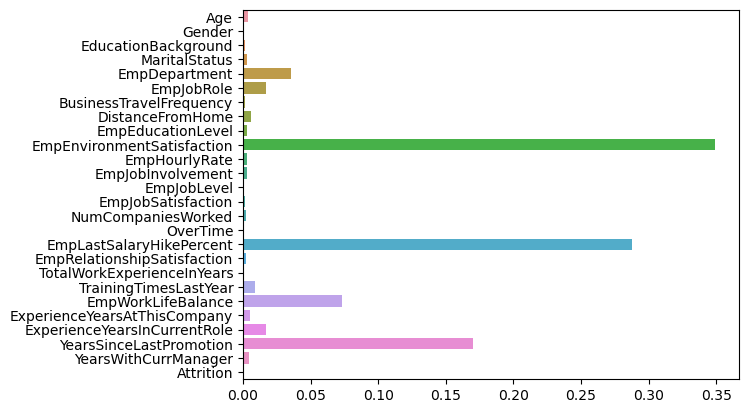

In [62]:
sns.barplot(x=gb.feature_importances_,y=x.columns)
plt.show()

## Top 3 Important Features effecting employee performance:
### 1.EmpEnvironmentSatisfaction
### 2.EmpLastSalaryHikePercent
### 3.YearsSinceLastPromotion....

### Model saving

In [ ]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)